## Goal:

To have personalized diet recommendations for Individuals living with chronic conditions i.e Diabetes, Hypertension, Heart Disease, and Obesity based on health parameters and lifestyle habits.

## Dataset Source:
[Personalized Diet Recommendations Dataset on Kaggle](https://www.kaggle.com/datasets/ziya07/personalized-medical-diet-recommendations-dataset)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Personalized_Diet_Recommendations.csv')

In [ ]:
df.shape

(5000, 30)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                5000 non-null   object 
 1   Age                       5000 non-null   int64  
 2   Gender                    5000 non-null   object 
 3   Height_cm                 5000 non-null   int64  
 4   Weight_kg                 5000 non-null   int64  
 5   BMI                       5000 non-null   float64
 6   Chronic_Disease           2957 non-null   object 
 7   Blood_Pressure_Systolic   5000 non-null   int64  
 8   Blood_Pressure_Diastolic  5000 non-null   int64  
 9   Cholesterol_Level         5000 non-null   int64  
 10  Blood_Sugar_Level         5000 non-null   int64  
 11  Genetic_Risk_Factor       5000 non-null   object 
 12  Allergies                 1503 non-null   object 
 13  Daily_Steps               5000 non-null   int64  
 14  Exercise

In [ ]:
df.head()

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Chronic_Disease,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,...,Protein_Intake,Carbohydrate_Intake,Fat_Intake,Preferred_Cuisine,Food_Aversions,Recommended_Calories,Recommended_Protein,Recommended_Carbs,Recommended_Fats,Recommended_Meal_Plan
0,P00001,56,Other,163,66,24.84,NaN,175,75,219,...,105,179,143,Western,NaN,2150,108,139,145,High-Protein Diet
1,P00002,69,Female,171,114,38.99,NaN,155,72,208,...,69,315,75,Mediterranean,NaN,1527,74,266,80,Balanced Diet
2,P00003,46,Female,172,119,40.22,NaN,137,101,171,...,183,103,148,Western,Sweet,2359,180,145,143,High-Protein Diet
3,P00004,32,Female,197,118,30.41,NaN,148,91,258,...,135,371,120,Western,NaN,2858,137,378,135,High-Protein Diet
4,P00005,60,Female,156,109,44.79,Hypertension,160,109,260,...,167,298,48,Indian,Spicy,1937,166,317,56,High-Protein Diet


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,48.805600,17.906991,18.00,34.00,49.00,64.0000,79.00
Height_cm,5000.0,174.244000,14.229173,150.00,162.00,174.00,186.0000,199.00
Weight_kg,5000.0,84.366200,20.181030,50.00,67.00,84.00,102.0000,119.00
BMI,5000.0,28.353134,8.297745,12.63,21.85,27.64,33.8125,52.89
Blood_Pressure_Systolic,5000.0,133.982400,26.216215,90.00,111.00,133.00,157.0000,179.00
Blood_Pressure_Diastolic,5000.0,89.735800,17.283025,60.00,75.00,90.00,105.0000,119.00
Cholesterol_Level,5000.0,224.297800,42.918923,150.00,187.00,224.00,261.0000,299.00
Blood_Sugar_Level,5000.0,159.330200,52.149430,70.00,114.00,160.00,204.0000,249.00
Daily_Steps,5000.0,8458.922800,3742.408853,2004.00,5278.75,8452.00,11671.7500,14997.00
Exercise_Frequency,5000.0,2.978200,2.001431,0.00,1.00,3.00,5.0000,6.00


In [ ]:
df.isna().sum()

,0
Patient_ID,0
Age,0
Gender,0
Height_cm,0
Weight_kg,0
BMI,0
Chronic_Disease,2043
Blood_Pressure_Systolic,0
Blood_Pressure_Diastolic,0
Cholesterol_Level,0


In [ ]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Height_cm', 'Weight_kg', 'BMI',
       'Chronic_Disease', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Cholesterol_Level', 'Blood_Sugar_Level',
       'Genetic_Risk_Factor', 'Allergies', 'Daily_Steps', 'Exercise_Frequency',
       'Sleep_Hours', 'Alcohol_Consumption', 'Smoking_Habit', 'Dietary_Habits',
       'Caloric_Intake', 'Protein_Intake', 'Carbohydrate_Intake', 'Fat_Intake',
       'Preferred_Cuisine', 'Food_Aversions', 'Recommended_Calories',
       'Recommended_Protein', 'Recommended_Carbs', 'Recommended_Fats',
       'Recommended_Meal_Plan'],
      dtype='object')

Chronic Diseases in Question

In [ ]:
df["Chronic_Disease"].unique()

array([nan, 'Hypertension', 'Diabetes', 'Heart Disease', 'Obesity'],
      dtype=object)

In [ ]:
df["Chronic_Disease"]. value_counts(normalize=True)*100

,proportion
Chronic_Disease,
Diabetes,34.460602
Heart Disease,25.329726
Hypertension,23.435915
Obesity,16.773757


Outliers:

In [ ]:
def handle_outliers(data, columns):
    for column in columns:
        if column in data.columns:
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1
            low_b = q1 - 1.5 * iqr
            high_b = q3 + 1.5 * iqr

            outliers = (data[column] < low_b) | (data[column] > high_b)

            if outliers.any():
                print(f"{column}: has outliers")
                data[column] = np.where(data[column] < low_b, low_b,
                                    np.where(data[column] > high_b, high_b, data[column]))
            else:
                print(f"{column}: No outliers")

    return data

num_col = df.select_dtypes(include='number').columns
df = handle_outliers(df, num_col)

Age: No outliers
Height_cm: No outliers
Weight_kg: No outliers
BMI: has outliers
Blood_Pressure_Systolic: No outliers
Blood_Pressure_Diastolic: No outliers
Cholesterol_Level: No outliers
Blood_Sugar_Level: No outliers
Daily_Steps: No outliers
Exercise_Frequency: No outliers
Sleep_Hours: No outliers
Caloric_Intake: No outliers
Protein_Intake: No outliers
Carbohydrate_Intake: No outliers
Fat_Intake: No outliers
Recommended_Calories: No outliers
Recommended_Protein: No outliers
Recommended_Carbs: No outliers
Recommended_Fats: No outliers


Feature Analysis

<Axes: title={'center': 'Recommended Meal Plans'}, xlabel='Recommended_Meal_Plan', ylabel='count'>

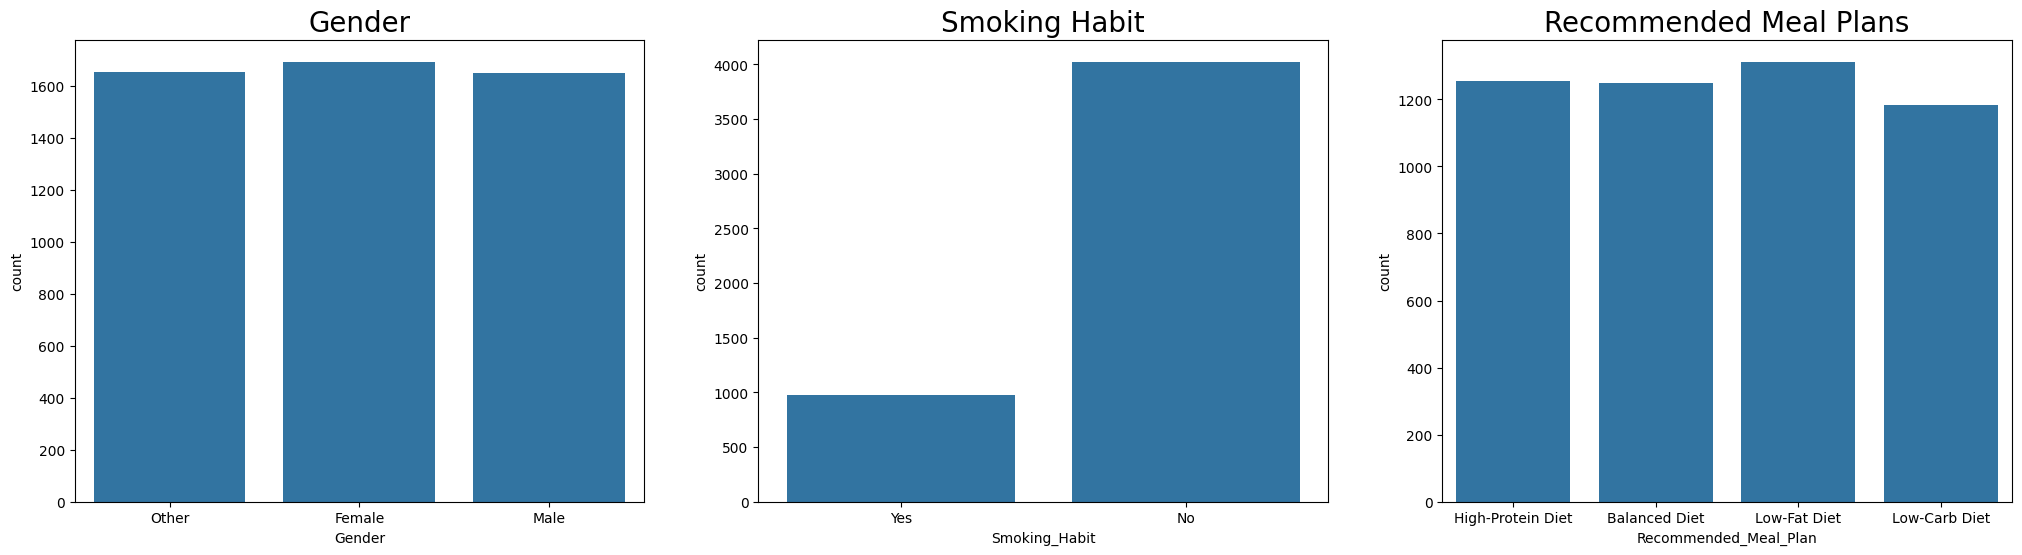

In [ ]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt.title("Gender",fontsize=20)
sns.countplot(data=df, x="Gender")

plt.subplot(1,3,2)
plt.title("Smoking Habit",fontsize=20)
sns.countplot(data=df, x="Smoking_Habit")

plt.subplot(1,3,3)
plt.title("Recommended Meal Plans",fontsize=20)
sns.countplot(data=df, x="Recommended_Meal_Plan")

(<Axes: title={'center': 'Caloric Intake'}, xlabel='Caloric_Intake', ylabel='Count'>,
 Text(0.5, 1.0, 'Caloric Intake'))

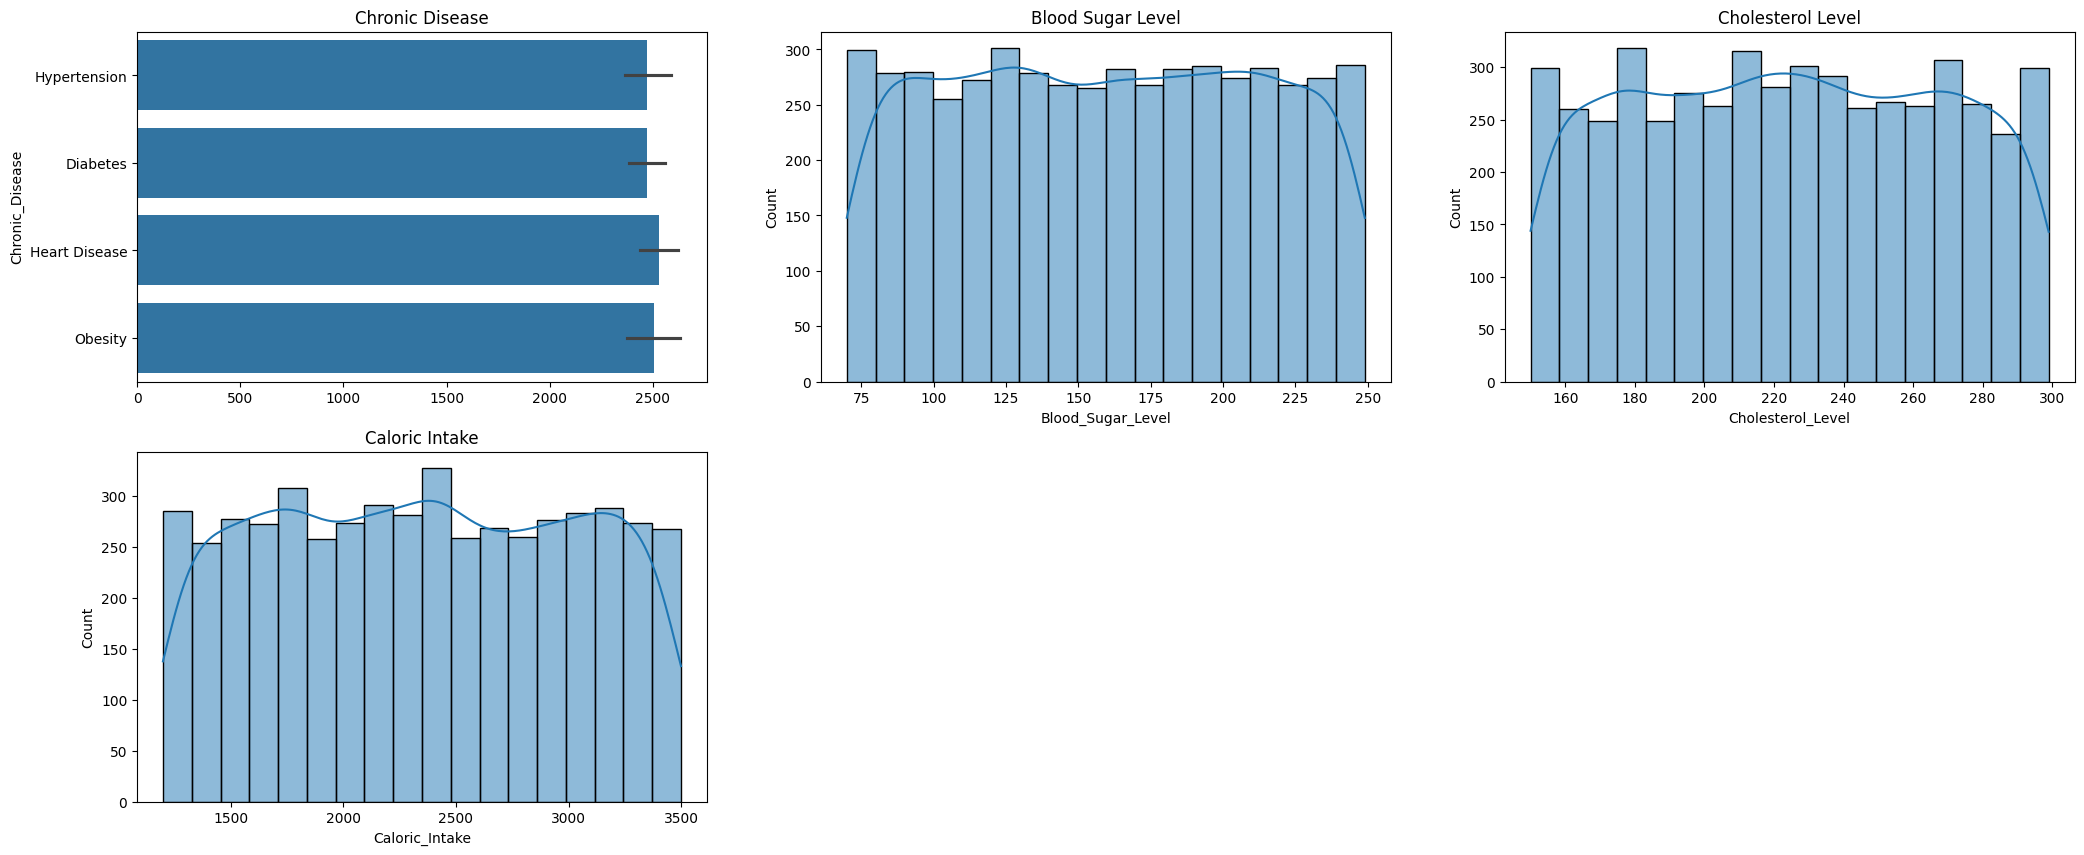

In [ ]:
plt.figure(figsize=(25,10))

plt.subplot(2,3,1)
sns.barplot(df["Chronic_Disease"],), plt.title("Chronic Disease")

plt.subplot(2,3,2)
sns.histplot(df["Blood_Sugar_Level"], kde=True),plt.title("Blood Sugar Level")

plt.subplot(2,3,3)
sns.histplot(df["Cholesterol_Level"], kde=True), plt.title("Cholesterol Level")

plt.subplot(2,3,4)
sns.histplot(df["Caloric_Intake"], kde=True), plt.title("Caloric Intake")

<ipython-input-20-31817f4a12f6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


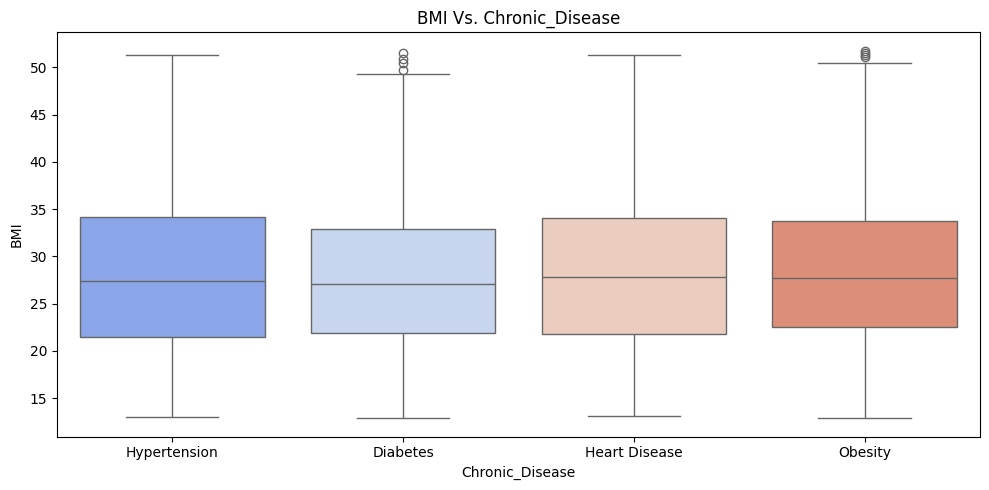

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x="Chronic_Disease",
    y="BMI",
    palette="coolwarm"
)
plt.title("BMI Vs. Chronic_Disease")
plt.xlabel("Chronic_Disease")
plt.ylabel('BMI')
plt.tight_layout()
plt.show()


Column Addition

In [ ]:
df["Obese"] = df["BMI"] > 30
df["Diabetic"] = df["Blood_Sugar_Level"] > 126
df["Hypertensive"] = (df['Blood_Pressure_Systolic'] > 130) & (df['Blood_Pressure_Diastolic'] > 80)
df.head()

,Patient_ID,Age,Gender,Height_cm,Weight_kg,BMI,Chronic_Disease,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,...,Preferred_Cuisine,Food_Aversions,Recommended_Calories,Recommended_Protein,Recommended_Carbs,Recommended_Fats,Recommended_Meal_Plan,Obese,Diabetic,Hypertensive
0,P00001,56,Other,163,66,24.84,NaN,175,75,219,...,Western,NaN,2150,108,139,145,High-Protein Diet,False,False,False
1,P00002,69,Female,171,114,38.99,NaN,155,72,208,...,Mediterranean,NaN,1527,74,266,80,Balanced Diet,True,False,False
2,P00003,46,Female,172,119,40.22,NaN,137,101,171,...,Western,Sweet,2359,180,145,143,High-Protein Diet,True,True,True
3,P00004,32,Female,197,118,30.41,NaN,148,91,258,...,Western,NaN,2858,137,378,135,High-Protein Diet,True,True,True
4,P00005,60,Female,156,109,44.79,Hypertension,160,109,260,...,Indian,Spicy,1937,166,317,56,High-Protein Diet,True,True,True


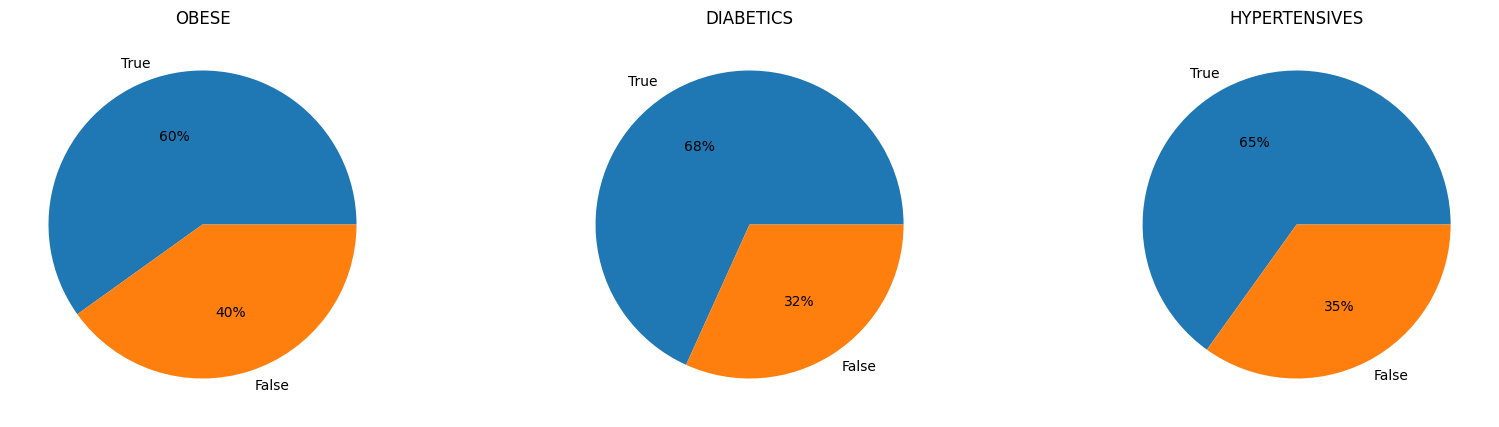

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
red_flags = df["Obese"].value_counts()
red_flags_labels = ["True", "False"]
plt.pie(red_flags, labels=red_flags_labels, autopct='%.0f%%')
plt.title("OBESE")

plt.subplot(1,3,2)
red_flags = df["Diabetic"].value_counts()
red_flags_labels = ["True", "False"]
plt.pie(red_flags, labels=red_flags_labels, autopct='%.0f%%')
plt.title("DIABETICS")

plt.subplot(1,3,3)
red_flags = df["Hypertensive"].value_counts()
red_flags_labels = ["True", "False"]
plt.pie(red_flags, labels=red_flags_labels, autopct='%.0f%%')
plt.title("HYPERTENSIVES")

plt.show()

<ipython-input-23-c68772115207>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exercise_Level', y='BMI', palette='Set2')


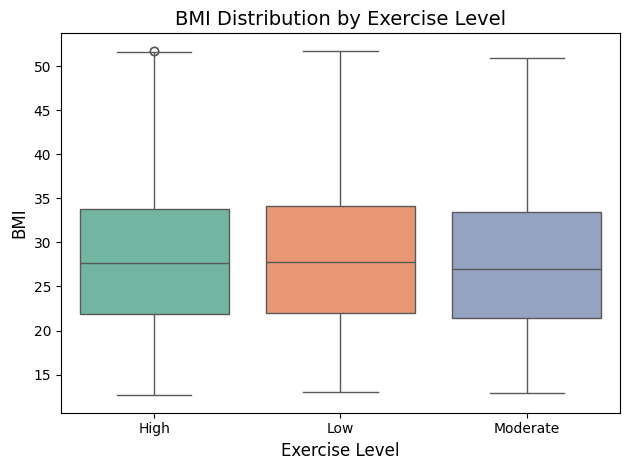

In [ ]:
def categorize_exercise(value):
    if value < 2:
        return 'Low'
    elif value == 3:
        return 'Moderate'
    else:
        return 'High'

df['Exercise_Level'] = df['Exercise_Frequency'].apply(categorize_exercise)
df.head(3)

sns.boxplot(data=df, x='Exercise_Level', y='BMI', palette='Set2')
plt.title("BMI Distribution by Exercise Level", fontsize=14)
plt.xlabel("Exercise Level", fontsize=12)
plt.ylabel("BMI", fontsize=12)
plt.tight_layout()
plt.show()

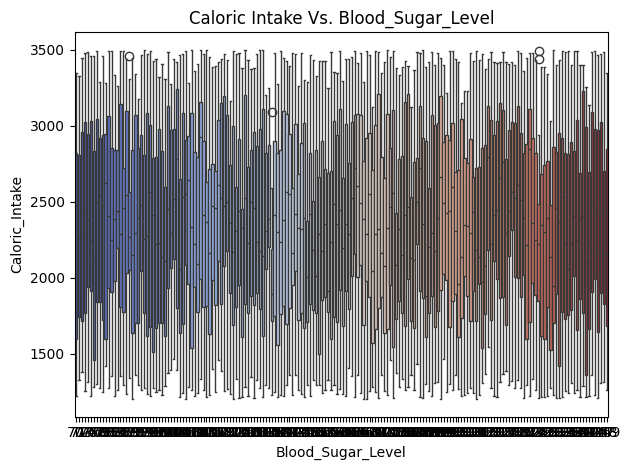

In [ ]:
sns.boxplot(data=df, x="Blood_Sugar_Level", y="Caloric_Intake", palette="coolwarm")

plt.title("Caloric Intake Vs. Blood_Sugar_Level")
plt.xlabel("Blood_Sugar_Level")
plt.ylabel("Caloric_Intake")
plt.tight_layout()
plt.show()

In [ ]:
df["Recommended_Meal_Plan"].value_counts(normalize=True)*100

,proportion
Recommended_Meal_Plan,
Low-Fat Diet,26.26
High-Protein Diet,25.10
Balanced Diet,25.00
Low-Carb Diet,23.64


([0, 1, 2, 3],
 [Text(0, 0, 'High-Protein Diet'),
  Text(1, 0, 'Balanced Diet'),
  Text(2, 0, 'Low-Fat Diet'),
  Text(3, 0, 'Low-Carb Diet')])

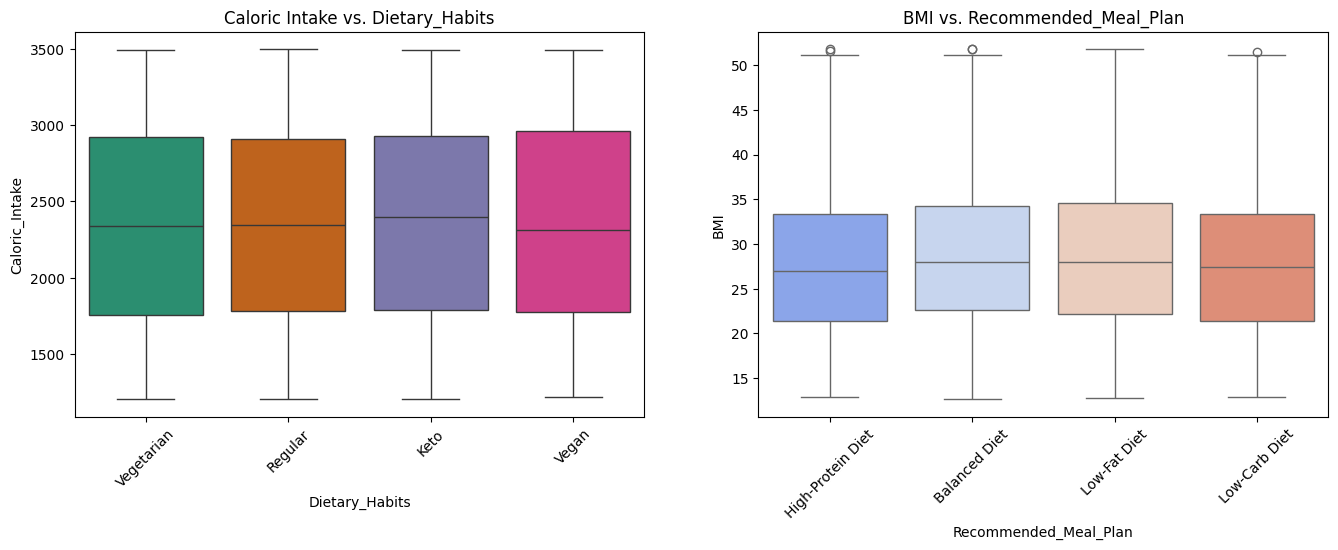

In [ ]:
plt.figure(figsize=(25,5))

plt.subplot(1,3,1)
sns.boxplot(data=df, x="Dietary_Habits", y="Caloric_Intake", palette="Dark2")
plt.xticks(rotation=45)
plt.title("Caloric Intake vs. Dietary_Habits")

plt.subplot(1,3,2)
sns.boxplot(data=df, x="Recommended_Meal_Plan", y="BMI", palette="coolwarm",)
plt.xticks(rotation=45)
plt.title("BMI vs. Recommended_Meal_Plan")
plt.xticks(rotation=45)

In [ ]:
meal_plan_stats = df.groupby(["Recommended_Meal_Plan", "Chronic_Disease"]).agg(
    {"BMI": ["min", "mean", "max"],
     "Blood_Sugar_Level": ["min", "mean", "max"],
     "Cholesterol_Level": ["min", "mean", "max"],
     "Caloric_Intake": ["min", "mean", "max"]}
)

meal_plan_stats

BMI                       \
                                         min       mean       max   
Recommended_Meal_Plan Chronic_Disease                               
Balanced Diet         Diabetes         13.82  27.518507  50.87000   
                      Heart Disease    13.85  28.421006  49.12000   
                      Hypertension     13.01  28.193424  49.98000   
                      Obesity          13.69  30.011299  51.75625   
High-Protein Diet     Diabetes         12.88  27.542446  49.13000   
                      Heart Disease    14.40  28.628093  48.89000   
                      Hypertension     13.13  27.382655  49.33000   
                      Obesity          13.02  27.795116  51.11000   
Low-Carb Diet         Diabetes         13.26  27.838498  50.44000   
                      Heart Disease    13.13  28.229251  51.11000   
                      Hypertension     13.02  28.222242  49.53000   
                      Obesity          12.88  28.464505  51.51000   
Low-Fat Diet          Diabetes         13.55  28.371965  51.51000   
                      Heart Disease    13.54  28.567035  51.31000   
                      Hypertension     13.13  29.201557  51.31000   
                      Obesity          13.56  28.048203  51.31000   

                                      Blood_Sugar_Level                   \
                                                    min        mean  max   
Recommended_Meal_Plan Chronic_Disease                                      
Balanced Diet         Diabetes                       72  159.488806  249   
                      Heart Disease                  70  157.142012  249   
                      Hypertension                   71  164.342391  248   
                      Obesity                        70  157.234375  247   
High-Protein Diet     Diabetes                       71  156.184549  249   
                      Heart Disease                  71  160.561856  249   
                      Hypertension                   70  157.655367  249   
                      Obesity                        73  159.217054  246   
Low-Carb Diet         Diabetes                       70  155.587983  247   
                      Heart Disease                  70  165.732620  249   
                      Hypertension                   70  155.084848  248   
                      Obesity                        70  161.279279  249   
Low-Fat Diet          Diabetes                       70  159.108772  248   
                      Heart Disease                  71  162.402010  249   
                      Hypertension                   73  161.532934  247   
                      Obesity                        70  160.296875  249   

                                      Cholesterol_Level                   \
                                                    min        mean  max   
Recommended_Meal_Plan Chronic_Disease                                      
Balanced Diet         Diabetes                      152  228.160448  299   
                      Heart Disease                 151  228.621302  299   
                      Hypertension                  151  221.880435  299   
                      Obesity                       150  224.484375  299   
High-Protein Diet     Diabetes                      150  218.866953  299   
                      Heart Disease                 151  220.597938  299   
                      Hypertension                  150  222.858757  299   
                      Obesity                       150  231.031008  299   
Low-Carb Diet         Diabetes                      150  223.090129  299   
                      Heart Disease                 150  226.754011  299   
                      Hypertension                  151  220.733333  299   
                      Obesity                       150  219.027027  297   
Low-Fat Diet          Diabetes                      150  223.407018  299   
                      Heart Disease                 150  222.442211 

In [ ]:
df.Recommended_Calories.describe()

,Recommended_Calories
count,5000.000000
mean,2046.236000
std,671.380142
min,725.000000
25%,1478.000000
50%,2044.000000
75%,2621.000000
max,3372.000000


#Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

x = df.drop(columns=['Patient_ID', 'Recommended_Meal_Plan'])
y = df['Recommended_Meal_Plan']

categorical_cols = ['Gender', 'Chronic_Disease', 'Genetic_Risk_Factor', 'Allergies',
                    'Alcohol_Consumption', 'Smoking_Habit', 'Preferred_Cuisine',
                    'Dietary_Habits', 'Food_Aversions', 'Physical_Activity_Level',
                    'Stress_Level', 'Alcohol_Consumption', 'Obese', 'Diabetic',
                    'Hypertensive', 'Exercise_Level']

for col in categorical_cols:
    if col in x.columns:
        le = LabelEncoder()
        x[col] = le.fit_transform(x[col])

numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train

,Age,Gender,Height_cm,Weight_kg,BMI,Chronic_Disease,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Level,Blood_Sugar_Level,...,Preferred_Cuisine,Food_Aversions,Recommended_Calories,Recommended_Protein,Recommended_Carbs,Recommended_Fats,Obese,Diabetic,Hypertensive,Exercise_Level
1840,-0.826888,0.010266,-0.017150,-0.662381,-0.591005,1.023684,0.611042,0.073154,0.365894,0.760771,...,0.449645,-0.442199,0.008586,-0.621432,1.104534,0.416636,-0.818199,0.682214,1.365771,1.956178
2115,0.792753,1.232390,-1.141713,0.130522,0.783262,1.023684,-0.724143,-1.373497,-1.265251,-1.540539,...,-1.334659,-0.442199,-0.357860,1.314352,2.004211,0.286198,1.222197,-1.465815,-0.732187,0.583614
4437,0.457655,0.010266,1.529124,-0.166817,-0.876708,-0.847767,-0.762292,1.461939,0.855237,0.242976,...,-0.442507,-0.442199,1.382014,-1.350198,0.479148,1.434056,-0.818199,0.682214,-0.732187,0.583614
1146,-1.608784,0.010266,1.458839,-0.414599,-1.008108,1.023684,-0.457106,0.536082,0.762029,-0.198108,...,-0.442507,1.353896,0.571662,0.243977,-0.464416,1.407969,-0.818199,0.682214,-0.732187,0.583614
2486,1.574649,-1.211858,-0.649716,0.626086,0.877291,1.023684,-0.037477,-0.852702,0.319290,1.182678,...,-1.334659,-1.340246,0.310979,1.337126,0.303602,0.468812,1.222197,0.682214,-0.732187,0.583614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,-0.268391,1.232390,-0.368576,-1.653510,-1.264879,0.399867,-1.220069,-0.910568,-0.472981,-0.351529,...,1.341796,1.353896,-1.673193,0.152881,0.325545,0.729688,-0.818199,0.682214,-0.732187,0.583614
466,-1.441235,-1.211858,1.037128,-0.315486,-0.785090,-0.847767,-1.334514,0.593949,0.645519,-0.044688,...,1.341796,-0.442199,1.180916,-1.099685,0.292630,0.025321,-0.818199,0.682214,-0.732187,-0.788950
3092,-1.552934,-1.211858,1.107413,0.427860,-0.312535,1.023684,0.153264,-0.331908,-1.498272,1.508697,...,0.449645,1.353896,1.474370,1.747056,-1.232433,-0.052942,-0.818199,0.682214,1.365771,-0.788950
3772,0.345955,-1.211858,-0.017150,0.328748,0.205829,1.023684,0.038820,1.461939,1.740716,0.281331,...,0.449645,1.353896,-0.886674,-0.211501,-0.596076,0.520987,1.222197,0.682214,1.365771,0.583614


## Regression


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
x = df.drop(columns=['Patient_ID', 'Recommended_Calories'])
y = df['Recommended_Calories']

In [ ]:
categorical_cols = ['Gender', 'Chronic_Disease', 'Genetic_Risk_Factor', 'Allergies',
                    'Alcohol_Consumption', 'Smoking_Habit', 'Preferred_Cuisine',
                    'Dietary_Habits', 'Food_Aversions', 'Physical_Activity_Level',
                    'Stress_Level', 'Obese', 'Diabetic',
                    'Hypertensive', 'Exercise_Level', "Recommended_Meal_Plan"]

for col in categorical_cols:
    if col in x.columns:
        le = LabelEncoder()
        x[col] = le.fit_transform(x[col])

In [ ]:
numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)



In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(f"\n{name}")
    print("-" * len(name))
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


Linear Regression
-----------------
R² Score: 0.9718
MAE: 98.81
MSE: 13080.24
RMSE: 114.37

Random Forest
-------------
R² Score: 0.9694
MAE: 101.71
MSE: 14218.45
RMSE: 119.24

Decision Tree
-------------
R² Score: 0.9404
MAE: 135.47
MSE: 27688.00
RMSE: 166.40

Support Vector Regressor
------------------------
R² Score: 0.0757
MAE: 568.17
MSE: 429158.34
RMSE: 655.10

Gradient Boosting
-----------------
R² Score: 0.9708
MAE: 99.60
MSE: 13542.55
RMSE: 116.37


In [ ]:
y_pred = model.predict(x_test[:5])

results = pd.DataFrame({
    'Predicted Calories': y_pred,
    'Actual Calories': y_test[:5].values
})

print(results)

   Predicted Calories  Actual Calories
0         2972.371539             2877
1         1034.955537              997
2         1947.104969             1815
3         1079.942344             1165
4         2683.503351             2754


In [ ]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('encoders.pkl', 'wb') as f:
    pickle.dump(le, f)
